In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from numpy.linalg import inv
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

class RidgeRegression:
    def __init__(self, degree, lam):
        self.deg = degree
        self.lam = lam
        self.w = None
    
    def fit(self, X, y):
        X_tmp = PolynomialFeatures(self.deg).fit_transform(X)
        X_t = X_tmp.transpose()
        I = np.eye(N=X_tmp.shape[1])
        
        pseudo_inv = inv(np.dot(X_t, X_tmp) + I * self.lam)
        self.w = np.dot(np.dot(pseudo_inv, X_t), y)
    
    def predict(self, X):
        X_tmp = PolynomialFeatures(self.deg).fit_transform(X)
        return np.dot(X_tmp, self.w)

In [22]:
def draw_point(X, y):
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.figure()
    plt.scatter(X, y, color='k')
    
def curves_ridge(X, y, X_train, y_train, X_test, y_test, deg, lambdas):
    draw_point(X, y)
    x_min = np.min(X)
    x_max = np.max(X)

    labels = []
    scores = []
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    for lam in lambdas:
        lr = RidgeRegression(degree=deg, lam=lam)
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)
        scores.append("lambda = " + str(lam) + "\t R2 score: " + str(r2_score(y_test, y_pred)))

        x = np.linspace(x_min, x_max, 100)
        x = np.reshape(x, newshape=(x.shape[0], 1))

        x_ = PolynomialFeatures(deg).fit_transform(x)

        plt.plot(x, np.dot(x_, lr.w))
        labels.append('lambda = ' + str(lam))

    plt.legend(labels)
    plt.show()
    for i in scores:
        print(i)

In [23]:
data = pd.read_csv("noisysine.csv")
X = data.drop('y', axis=1).as_matrix()
y = data['y'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# degree = 1

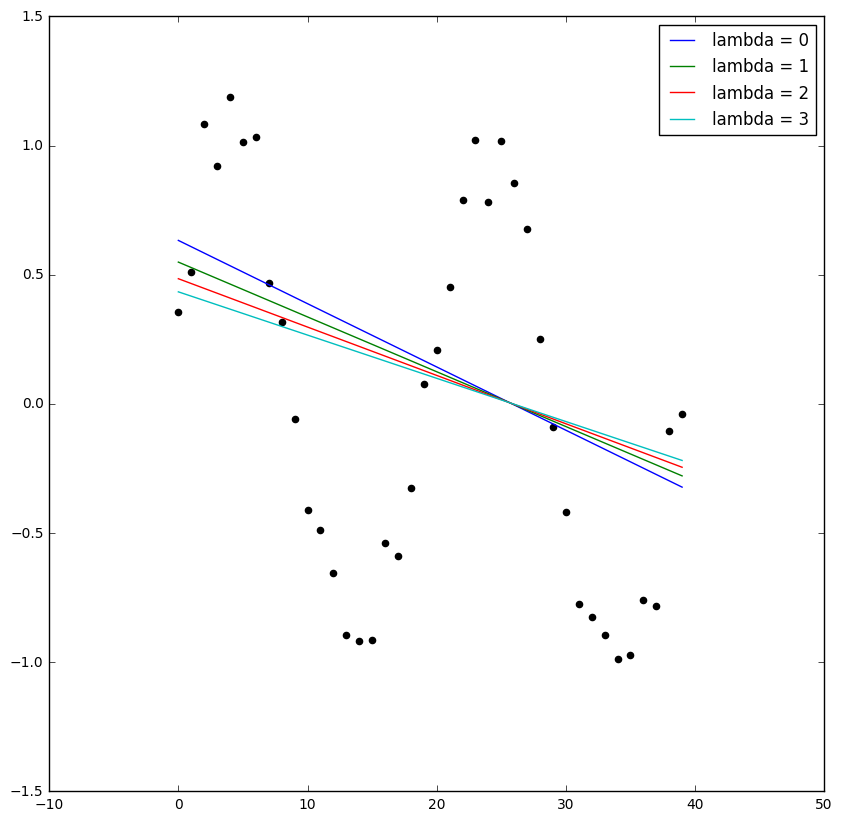

lambda = 0	 R2 score: -0.172641043002
lambda = 1	 R2 score: -0.143924322052
lambda = 2	 R2 score: -0.130103878861
lambda = 3	 R2 score: -0.124194520085


In [24]:
curves_ridge(X, y, X_train, y_train, X_test, y_test, 1, np.arange(0, 4, 1))

# degree = 2

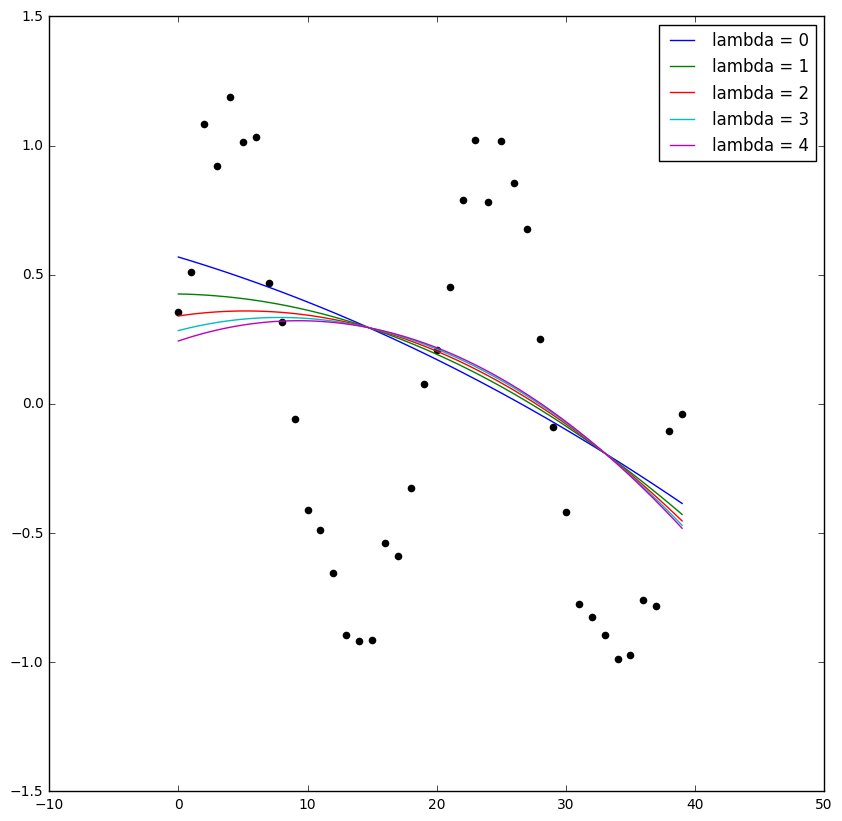

lambda = 0	 R2 score: -0.195372832768
lambda = 1	 R2 score: -0.209078720214
lambda = 2	 R2 score: -0.225477326995
lambda = 3	 R2 score: -0.239690717166
lambda = 4	 R2 score: -0.251383540921


In [25]:
curves_ridge(X, y, X_train, y_train, X_test, y_test, 2, np.arange(0, 5, 1))

# degree = 3

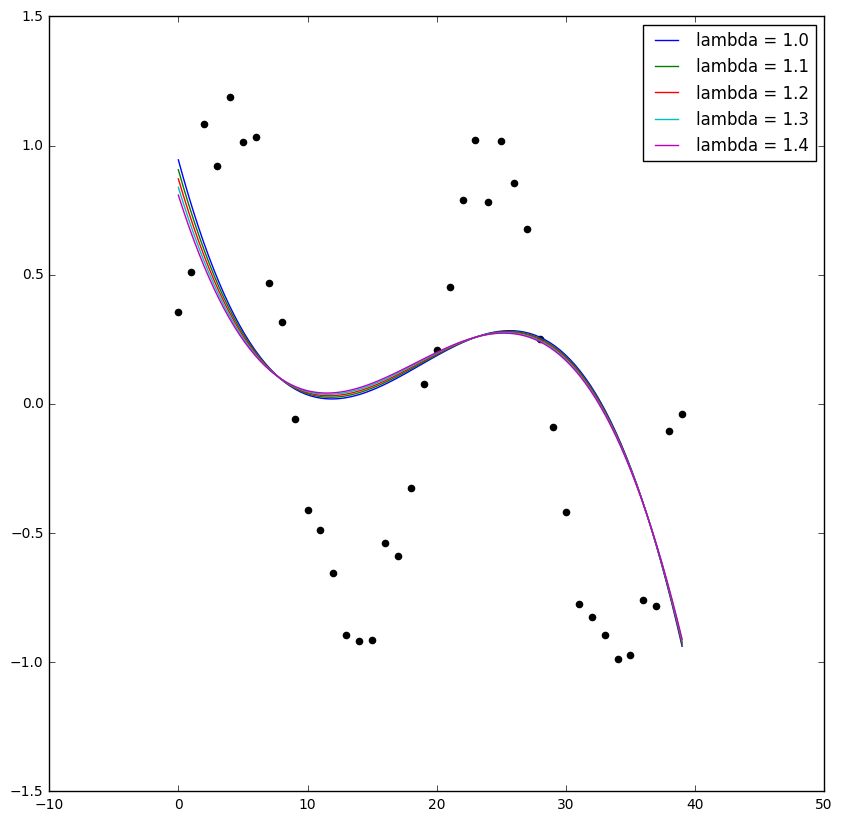

lambda = 1.0	 R2 score: -0.212152315881
lambda = 1.1	 R2 score: -0.206449363494
lambda = 1.2	 R2 score: -0.202112533475
lambda = 1.3	 R2 score: -0.198888491273
lambda = 1.4	 R2 score: -0.196574392481


In [26]:
curves_ridge(X, y, X_train, y_train, X_test, y_test, 3, np.arange(1, 1.5, 0.1))

In [27]:
def results_ridge(X_train, y_train, X_test, y_test, deg, lambdas):
    for lam in lambdas:
        lr = RidgeRegression(degree=deg, lam=lam)
        lr.fit(X_train, y_train)
        
        y_pred = lr.predict(X_test)
        print("lambda = " + str(lam) + \
              "\t R2 score: " + str(r2_score(y_test, y_pred)))

In [28]:
hydro = pd.read_csv('hydrodynamics.csv')
X_hydro = hydro.drop('y', axis=1)
y_hydro = hydro['y']
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(X_hydro, y_hydro, test_size=0.3)

# hydrodynamics. degree = 2

In [29]:
results_ridge(X_h_train, y_h_train, X_h_test, y_h_test, 2, np.arange(0, 1e-3, 1e-4))

lambda = 0.0	 R2 score: 0.918882572044
lambda = 0.0001	 R2 score: 0.92091985287
lambda = 0.0002	 R2 score: 0.920841764415
lambda = 0.0003	 R2 score: 0.920670571884
lambda = 0.0004	 R2 score: 0.920445442189
lambda = 0.0005	 R2 score: 0.920181096593
lambda = 0.0006	 R2 score: 0.919885509845
lambda = 0.0007	 R2 score: 0.919563781406
lambda = 0.0008	 R2 score: 0.919219506956
lambda = 0.0009	 R2 score: 0.918855397556
